<a href="https://colab.research.google.com/github/footballest/ml-blog-jaketae/blob/main/notebooks/chutes_and_ladders_markovchains.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Marov Chains via Chutes and Ladders game – Replication/Notes

**Original post**: <https://jaketae.github.io/study/markov-chain/>   
**Last updated**: <YYYY-MM-DD>

---

## Goals
- Summarize key ideas in my own words
- Implement the core algorithm from scratch (where feasible)
- Compare with a reference implementation (if relevant)
- Run a tiny experiment and record results


In [1]:

#@title Setup (mount Drive and create workspace paths)
from google.colab import drive
drive.mount('/content/drive')
BASE_DIR = '/content/drive/MyDrive/ml-blog'
DATA_DIR = f'{BASE_DIR}/data'
IMG_DIR = f'{BASE_DIR}/images'
ART_DIR = f'{BASE_DIR}/artifacts'

import os
for d in [BASE_DIR, DATA_DIR, IMG_DIR, ART_DIR]:
    os.makedirs(d, exist_ok=True)
print("Workspace ready:", BASE_DIR)


Mounted at /content/drive
Workspace ready: /content/drive/MyDrive/ml-blog


In [2]:

#@title Environment check (optional)
try:
    import torch
    print("PyTorch:", torch.__version__)
    if torch.cuda.is_available():
        print("CUDA device:", torch.cuda.get_device_name(0))
except Exception as e:
    print("Torch not available by default on Colab runtimes; that's okay.", e)


PyTorch: 2.8.0+cu126


## Theory recap
Markov Chains

## Implementation (from scratch or minimal lib use)
Add your code here.

## Experiments
Describe the dataset, metrics, and small experiments you ran.

## Results & Discussion
What worked? What didn’t? What would you try next?

## References
- Add links to papers, docs, and the original post.



```

```
## Rough



In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# Naive function for the stochastic matrix of the game - w/o accounting for the jumpsin the game.
def naive_stochastic_mat(dim=101, roll=6):

    """Returns a 2D numpy stochastic matrix."""

    # Initialize ndarray of zeros
    T_1 = np.zeros((dim, dim))

    # Assign probability to appropriate entries
    for i in range(101):
        if i < 95:
            T_1[i + 1:i + 1 + roll, i] = 1. / roll
        elif i != 100:
            T_1[i + 1:100, i] = 1. / roll
            T_1[100, i] = 1 - (1. / roll) * (99 - i)
        else:
            T_1[i, i] = 1.

    return T_1

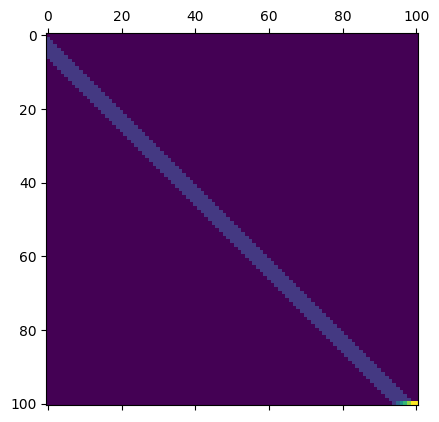

In [45]:
naive_stocm = naive_stochastic_mat()
plt.matshow(naive_stocm)
plt.show() # as on can on only the next 6 integers in the sequence given the current state has positive probabilities

In [26]:
## setting the jumps as a dict
chutes_ladders = {
1: 38, 4: 14, 9: 31, 16: 6, 21: 42,
28: 84, 36: 44, 47: 26, 49: 11, 51: 67,
56: 53, 62: 19, 64: 60, 71: 91, 80: 100,
87: 24, 93: 73, 95: 75, 98: 78
}

In [29]:
# ndarray of 101 elements
# If i in chutes_ladders, replace i with corresponding value
index_lst = [chutes_ladders.get(j, j) for j in range(101)]
index_lst[0:10]

[0, 38, 2, 3, 14, 5, 6, 7, 8, 31]

In [53]:
# Initialize ndarray of zeros
T_2 = np.zeros((101, 101))

# Permutation matrix
T_2[index_lst, range(101)] = 1

In [54]:
T_2[:,4]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

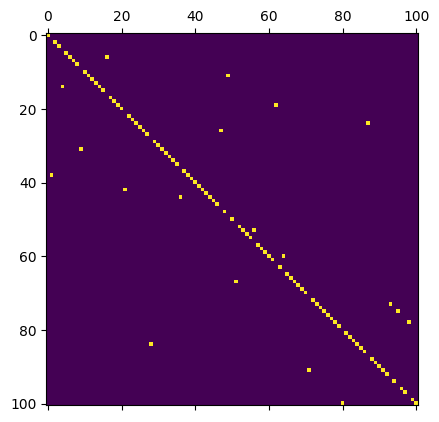

In [55]:
plt.matshow(T_2)
plt.show()

In [42]:
def stochastic_mat(dim=101, roll = 6):

    chutes_ladders = {
    1: 38, 4: 14, 9: 31, 16: 6, 21: 42,
    28: 84, 36: 44, 47: 26, 49: 11, 51: 67,
    56: 53, 62: 19, 64: 60, 71: 91, 80: 100,
    87: 24, 93: 73, 95: 75, 98: 78
    }

    T_1 = np.zeros((dim, dim))
    T_2 = np.zeros((dim, dim))

    for i in range(101):
        if i < 95:
            T_1[i + 1:i + 1 + roll, i] = 1. / roll
        elif i != 100:
            T_1[i + 1:100, i] = 1. / roll
            T_1[100, i] = 1 - (1. / roll) * (99 - i)
        else:
            T_1[i, i] = 1.

    index_lst = [chutes_ladders.get(j, j) for j in range(101)]

    T_2[index_lst, range(101)] = 1

    T = T_2 @ T_1

    return T

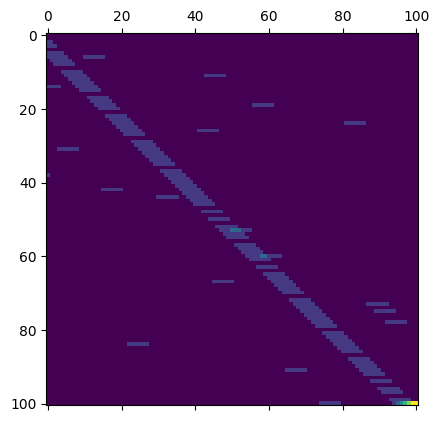

In [43]:
T = stochastic_mat()
plt.matshow(T)
plt.show()